In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
LATEST_SESSION = 8

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,name,death-1,death-2,death-3
0,Smallishbeans,4,5,-1
1,Smajor1995,7,-1,-1
2,bigbst4tz2,-1,-1,-1
3,Etho,5,6,-1
4,Bdouble0100,2,5,-1
5,Renthedog,4,5,-1
6,InTheLittleWood,7,-1,-1
7,GoodTimeWithScar,1,3,-1
8,impulseSV,7,-1,-1
9,Tango,5,7,-1


In [5]:
def positionCalculator(d):
    if (d["death-1"] == -1): 
            d.deathPosition1 = LATEST_SESSION
            d.deathPosition2 = LATEST_SESSION
            d.deathPosition3 = LATEST_SESSION
    else:
        if (d["death-2"] == -1): 
            d.deathPosition1 = d["death-1"] + 0.5
            d.deathPosition2 = LATEST_SESSION
            d.deathPosition3 = LATEST_SESSION

        else: 
            if (d["death-1"] == d["death-2"]): 
                if (d["death-3"] == -1): 
                    d.deathPosition1 = d["death-1"] + 0.25
                    d.deathPosition2 = d["death-2"] + 0.75
                    d.deathPosition3 = LATEST_SESSION

                else: 
                    if (d["death-3"] == -1): 
                        d.deathPosition1 = d["death-1"] + 0.5
                        d.deathPosition2 = d["death-2"] + 0.5
                        d.deathPosition3 = LATEST_SESSION

                    else: 
                        if (d["death-2"] == d["death-3"]): 
                            d.deathPosition1 = d["death-1"] + 0.5
                            d.deathPosition2 = d["death-2"] + 0.25
                            d.deathPosition3 = d["death-3"] + 0.75

                        else: 
                            d.deathPosition1 = d["death-1"] + 0.5
                            d.deathPosition2 = d["death-2"] + 0.5
                            d.deathPosition3 = d["death-3"] + 0.5   
            else: 
                if (d["death-3"] == -1): 
                    d.deathPosition1 = d["death-1"] + 0.5
                    d.deathPosition2 = d["death-2"] + 0.5
                    d.deathPosition3 = LATEST_SESSION

                else: 
                    if (d["death-2"] == d["death-3"]): 
                        d.deathPosition1 = d["death-1"] + 0.5
                        d.deathPosition2 = d["death-2"] + 0.25
                        d.deathPosition3 = d["death-3"] + 0.75

                    else: 
                        d.deathPosition1 = d["death-1"] + 0.5
                        d.deathPosition2 = d["death-2"] + 0.5
                        d.deathPosition3 = d["death-3"] + 0.5
    return (d.deathPosition1, d.deathPosition2, d.deathPosition3)

In [6]:
firstDeathPositions, secondDeathPositions, thirdDeathPositions = [], [], []
for index, d in df.iterrows():
    (death1, death2, death3) = positionCalculator(d)
    firstDeathPositions.append(death1)
    secondDeathPositions.append(death2)
    thirdDeathPositions.append(death3)

In [7]:
df = df.assign(deathPosition1=firstDeathPositions)
df = df.assign(deathPosition2=secondDeathPositions)
df = df.assign(deathPosition3=thirdDeathPositions)

In [8]:
df

,name,death-1,death-2,death-3,deathPosition1,deathPosition2,deathPosition3
0,Smallishbeans,4,5,-1,4.5,5.50,8.00
1,Smajor1995,7,-1,-1,7.5,8.00,8.00
2,bigbst4tz2,-1,-1,-1,8.0,8.00,8.00
3,Etho,5,6,-1,5.5,6.50,8.00
4,Bdouble0100,2,5,-1,2.5,5.50,8.00
5,Renthedog,4,5,-1,4.5,5.50,8.00
6,InTheLittleWood,7,-1,-1,7.5,8.00,8.00
7,GoodTimeWithScar,1,3,-1,1.5,3.50,8.00
8,impulseSV,7,-1,-1,7.5,8.00,8.00
9,Tango,5,7,-1,5.5,7.50,8.00


Text(0.5, 0, 'Session')

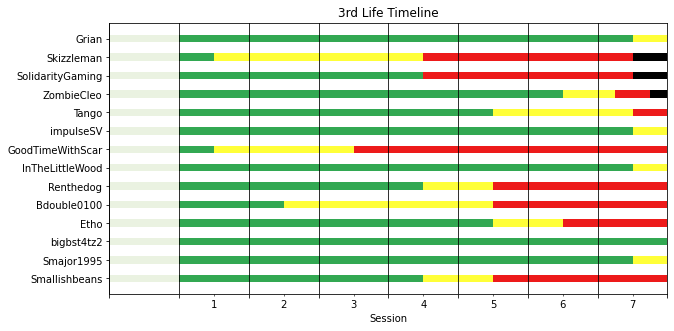

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xticklabels('')
ax.set_xticks([x + 0.5 for x in range(1, LATEST_SESSION+1)], minor=True)
ax.set_xticklabels([str(x) for x in range(1, LATEST_SESSION+1)], minor=True);

ax.set_yticks(range(len(df)))
ax.set_yticklabels(df["name"])

ax.grid(axis="x", color="black")

ax.barh(df['name'], [1 for _ in range(len(df))], height=0.4, color="#eaf2e1")
ax.barh(df['name'], df['deathPosition1'] - 1, height=0.4, left=[1 for _ in range(len(df))], color='#32a852')
ax.barh(df['name'], df['deathPosition2'] - df["deathPosition1"], height=0.4, left=df["deathPosition1"], color='#ffff38');
ax.barh(df['name'], df['deathPosition3'] - df["deathPosition2"], height=0.4, left=df["deathPosition2"], color='#ed1a1a');
ax.barh(df['name'], LATEST_SESSION - df["deathPosition3"], height=0.4, left=df["deathPosition3"], color='#000000');

ax.set_title("3rd Life Timeline")
ax.set_xlabel("Session")
